# Power

### MOSFETs
After choosing our controller and our power target, I started by choosing the MOSFETs for the controller half-bridge drivers.

After a little bit of searching I found the Infineon [IAUC60N04S6L039](https://www.infineon.com/dgdl/Infineon-IAUC60N04S6L039-DataSheet-v01_00-EN.pdf?fileId=5546d4626afcd350016b1c511cb70df6).

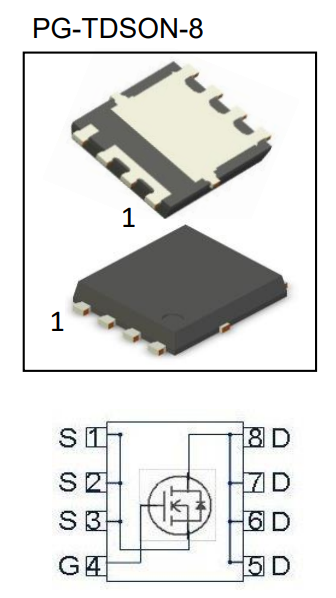

Here is how I chose it.

#### Initial Selection
With out STSPIN the main thing I was looking at was the typical gate-source voltage and the maximum current and voltage ratings.

The STSPIN has a built in LDO (low-dropout regulator) that supplies the gate-drivers with 12V. So, when looking at our datasheet we should make sure it is appropriately sized for a gate-source voltage of 12v.

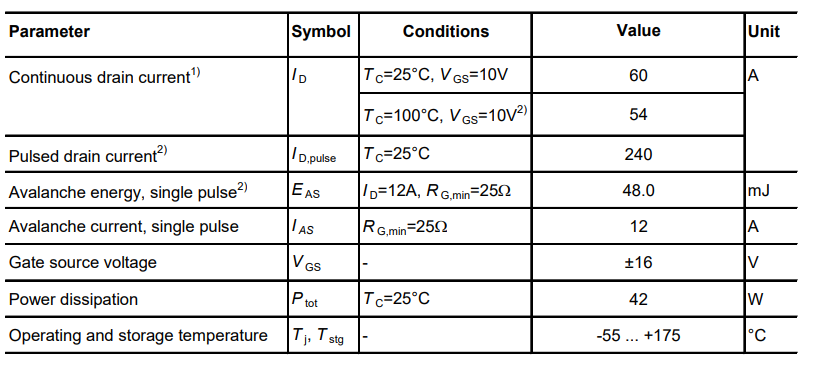

Looking at the initial table on the datasheet, we see that the MOSFET is rated for our desired max voltage and current. which is what we were looking for. We can also see that the maximum and minimum gate-source voltage of $\pm16V$ but this doesn't really tell us much, we have to dig deeper into the graphs to find the characteristics we are looking for.

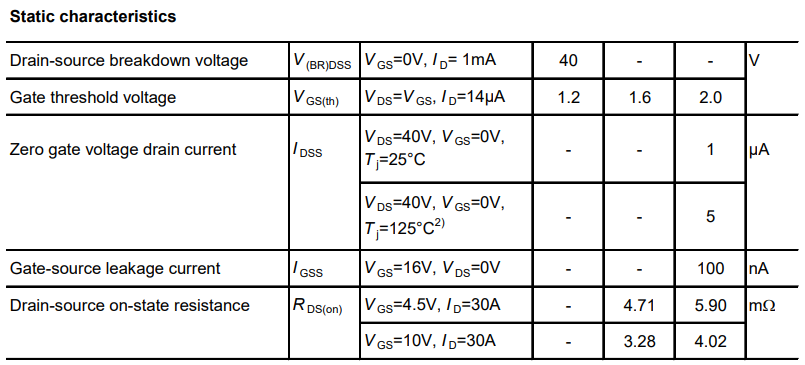

A little bit down we see some static characteristics of the MOSFET, namely a magic value for th drain-source on resistance when the gate-source voltage is at 10V:
$$R_{DS(on)} = 4.02m\Omega \; @ \; V_{GS} = 10V$$

This gives us a good idea of where we want to be in terms of gate-source voltage since a $4.02m\Omega$ worst case $R_{DS(on)}$ (larger Resistance is bad because that means more power dissipated) means at 60A of drain-source current we will dissipate:
$$P = I^2 \cdot R$$
$$P = 60A^2 \cdot 4.02m\Omega$$
$$P = 14.472W$$

And from the previous table we know the power dissipation at $T_C = 25\degree C$ is $P_{tot} = 42W$.

But these results are all for a gate-source voltage of 10V, to see how it would look at 12V we need to look at some graphs.

#### Graphs!
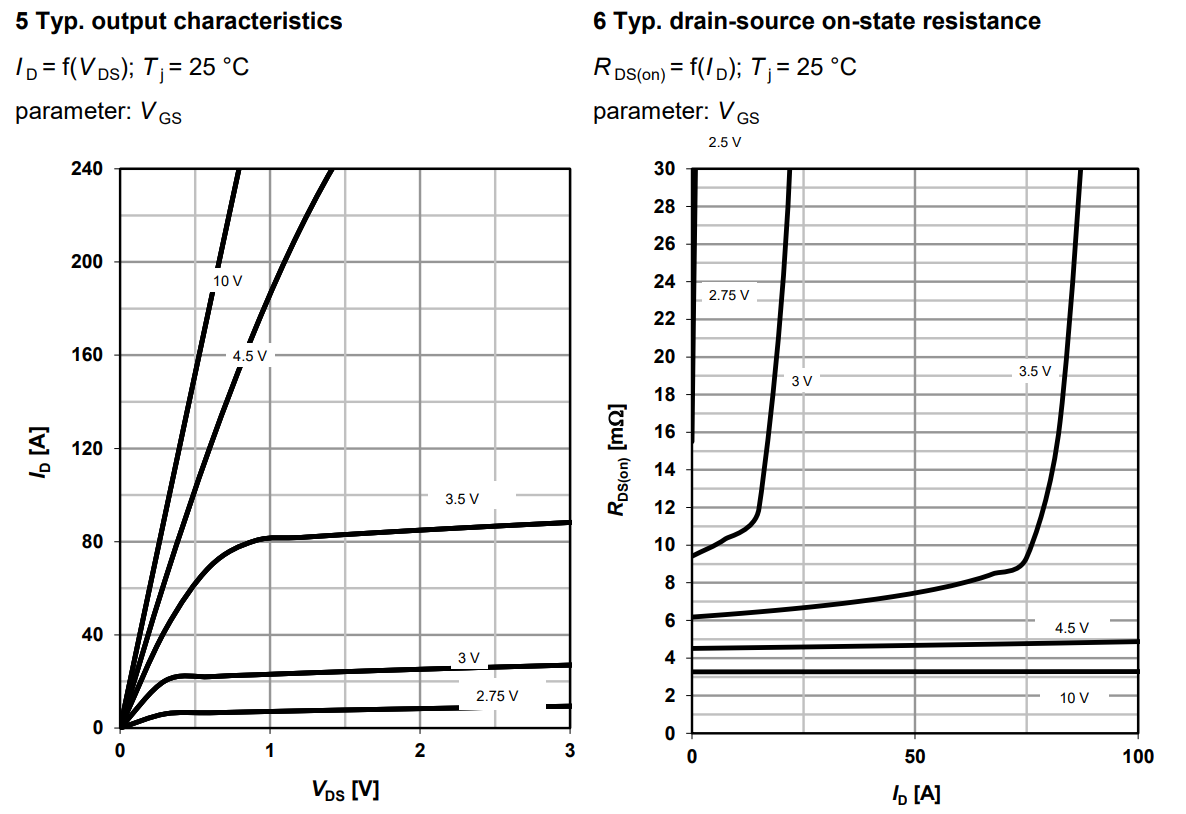

Lets start with the graph 5, this has the typical output characteristics of the MOSFET. Essentially, it tells us drain source voltage drop ($V_{DS}$) versus drain current ($I_D$) for a given gate source voltage $V_{GS}$.

We can calculate $R_{DS(on)}$ from $V_{DS}$ and $I_D$ using Ohm's law or we can multiply $V_{DS}$ and $I_D$ to get the power dissipated.

We can see that as $V_{GS}$ gets bigger, the drain-source voltage drop decreases for a given current. We previously calculated that the worst case with $V_{GS} = 10V$ we would only be dissipating around 14.5W of power and we can see from the graph that the voltage drop should not only decrease, but the curve should become more linear ($R_{DS(on)}$ should be more constant) at 12V so we should be fine.

For completeness sake we can get a more precise number if we estimate the voltage drop for $V_{GS} = 10V$ and $I_D = 60A$ on the curve: $V_{DS} \approx 0.2V$

This means:
$$P = I \cdot V$$
$$P = 60A * 0.2V$$
$$P = 12W$$

As we expected, this is less power than we calculated using the max $R_{DS(on)}$.

We would start to be scared if, for example saw that at 10V we were dissipating a significant amount of power and the curve was pretty nonlinear. Then, referencing $V_{DS}$ at your desired $I_D$ and $R_{DS(on)}$ from the graph may yield much lower results than using the values on the datasheet table.

Graph 6 basically tells us the same thing but with different axes.

#### (More) Graphs!
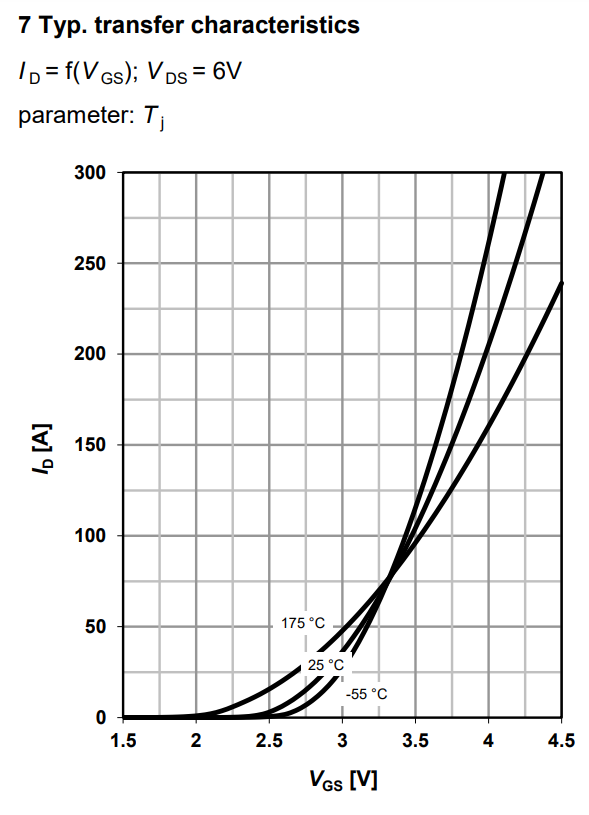

Graph 7 is another good graph to look at. It has the typical transfer characters of the MOSFET. We don't need to worry too much about it since our application is switching and we will be driving the MOSFET in the ohmic region (left side of output characteristics graph):
![](https://www.nexperia.com/dam/jcr:b82d07fb-ccce-474c-8ddb-e4b67d226e00/ON_OFF%20trajectories.png) *https://www.nexperia.com/dam/jcr:b82d07fb-ccce-474c-8ddb-e4b67d226e00/ON_OFF%20trajectories.png*

But we can see that at $I_D = 60A$ and $T_j = 25\degree C$ (operating temperature) the required gate-source voltage is about $V_{GS} \approx 3.15V$ which is much less than the 12V gate driver voltage.

More reading about MOSFET graphs here:
[https://www.vishay.com/docs/68214/turnonprocess.pdf](https://www.vishay.com/docs/68214/turnonprocess.pdf)
[https://assets.nexperia.com/documents/application-note/AN50006.pdf](https://assets.nexperia.com/documents/application-note/AN50006.pdf)

#### Input Capacitance
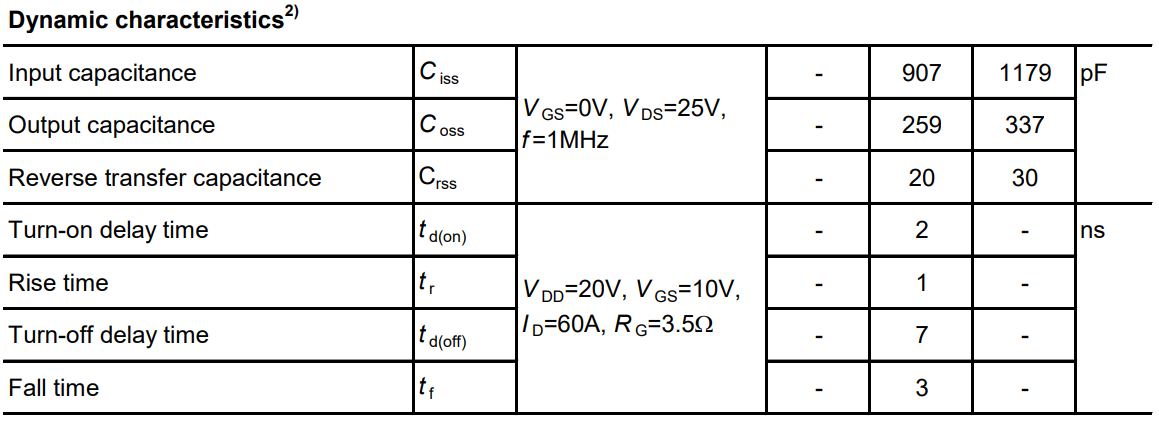

One more quick thing about this MOSFET. If we look at this table, we can see that it has a very low input capacitance. 

This input capacitance (sometimes called a parasitic capacitance) is inherent to the design of the MOSFET (read about it in the link below) and the higher it is the slower the MOSFET can switch.

So, the low input capacitance of this MOSFET allows for extremely fast switching times since the low capacitance means that for the set source/sink current of the driver the MOSFET "input capacitor" will charge/discharge in less time.

We can see this reflected in the extremely low rise, turn-off, and fall times on the table (when compared to similar Infineon MOSFETs in the same setup).

More reading about input capacitance:
[https://techweb.rohm.com/product/power-device/si/si-basic/4873/](https://techweb.rohm.com/product/power-device/si/si-basic/4873/)